<a href="https://colab.research.google.com/github/spikol/mmla/blob/main/decissiontree_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Descision Tree Classification and Regression 
(check out this [tutorial](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) for all the details)

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.
###How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
- All the tuples belong to the same attribute value.
- There are no more remaining attributes.
- There are no more instances.

####Information Gain
Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy.

####Gain Ratio
Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

####Gini index
Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.
###Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.
###Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.


---

#### Required Libraries
We are going to run the sample data first. Belo we need to insall the libraries 

In [1]:
#!pip install --quiet -r requirements.txt; 
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Loading the Data
Below we load the data from Github

In [2]:
col_names = ['session', 'time', 'distance', 'per', 'hand', 'num', 'audio', 'ide', 'label']
# load dataset
url='https://raw.githubusercontent.com/spikol/mmla/main/data03.csv'
#skip first row in csv since column labes
pelars = pd.read_csv(url, header=0, names=col_names)
pelars.head()
#print(pelars.dtypes)

,session,time,distance,per,hand,num,audio,ide,label
0,1552,53,0.856020,0.538462,0.510407,18.076923,0.548573,1,0
1,1553,53,1.294250,0.942308,0.945247,16.096154,1.404692,2,0
2,1554,53,1.266581,0.961538,0.672268,15.903846,1.023435,5,0
3,1555,53,1.238911,0.980769,0.399288,15.711538,0.642178,2,0
4,1556,53,1.211242,1.000000,0.126309,15.519231,0.260921,2,0


####Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).



In [3]:
#split dataset in features and target variable
feature_cols = ['session', 'distance', 'per', 'hand', 'num', 'audio','ide']
X = pelars[feature_cols] # Features
y = pelars.label # Target variable

#### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test|

####Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

####Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


####Visualizing Decision Trees
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter and Co Lab notebooks.

['session', 'distance', 'per', 'hand', 'num', 'audio', 'ide']


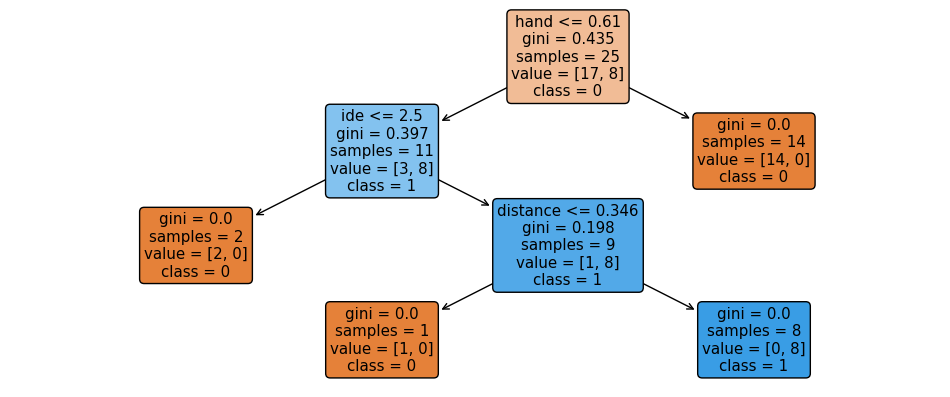

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
print(feature_cols)

plt.figure(figsize=(12, 5), dpi=100)
tree.plot_tree(clf,
               feature_names=feature_cols,
              
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('sample_data/graphics/dtree.png')

####Optimizing Decision Tree Performance
criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9090909090909091


### Visualization with features

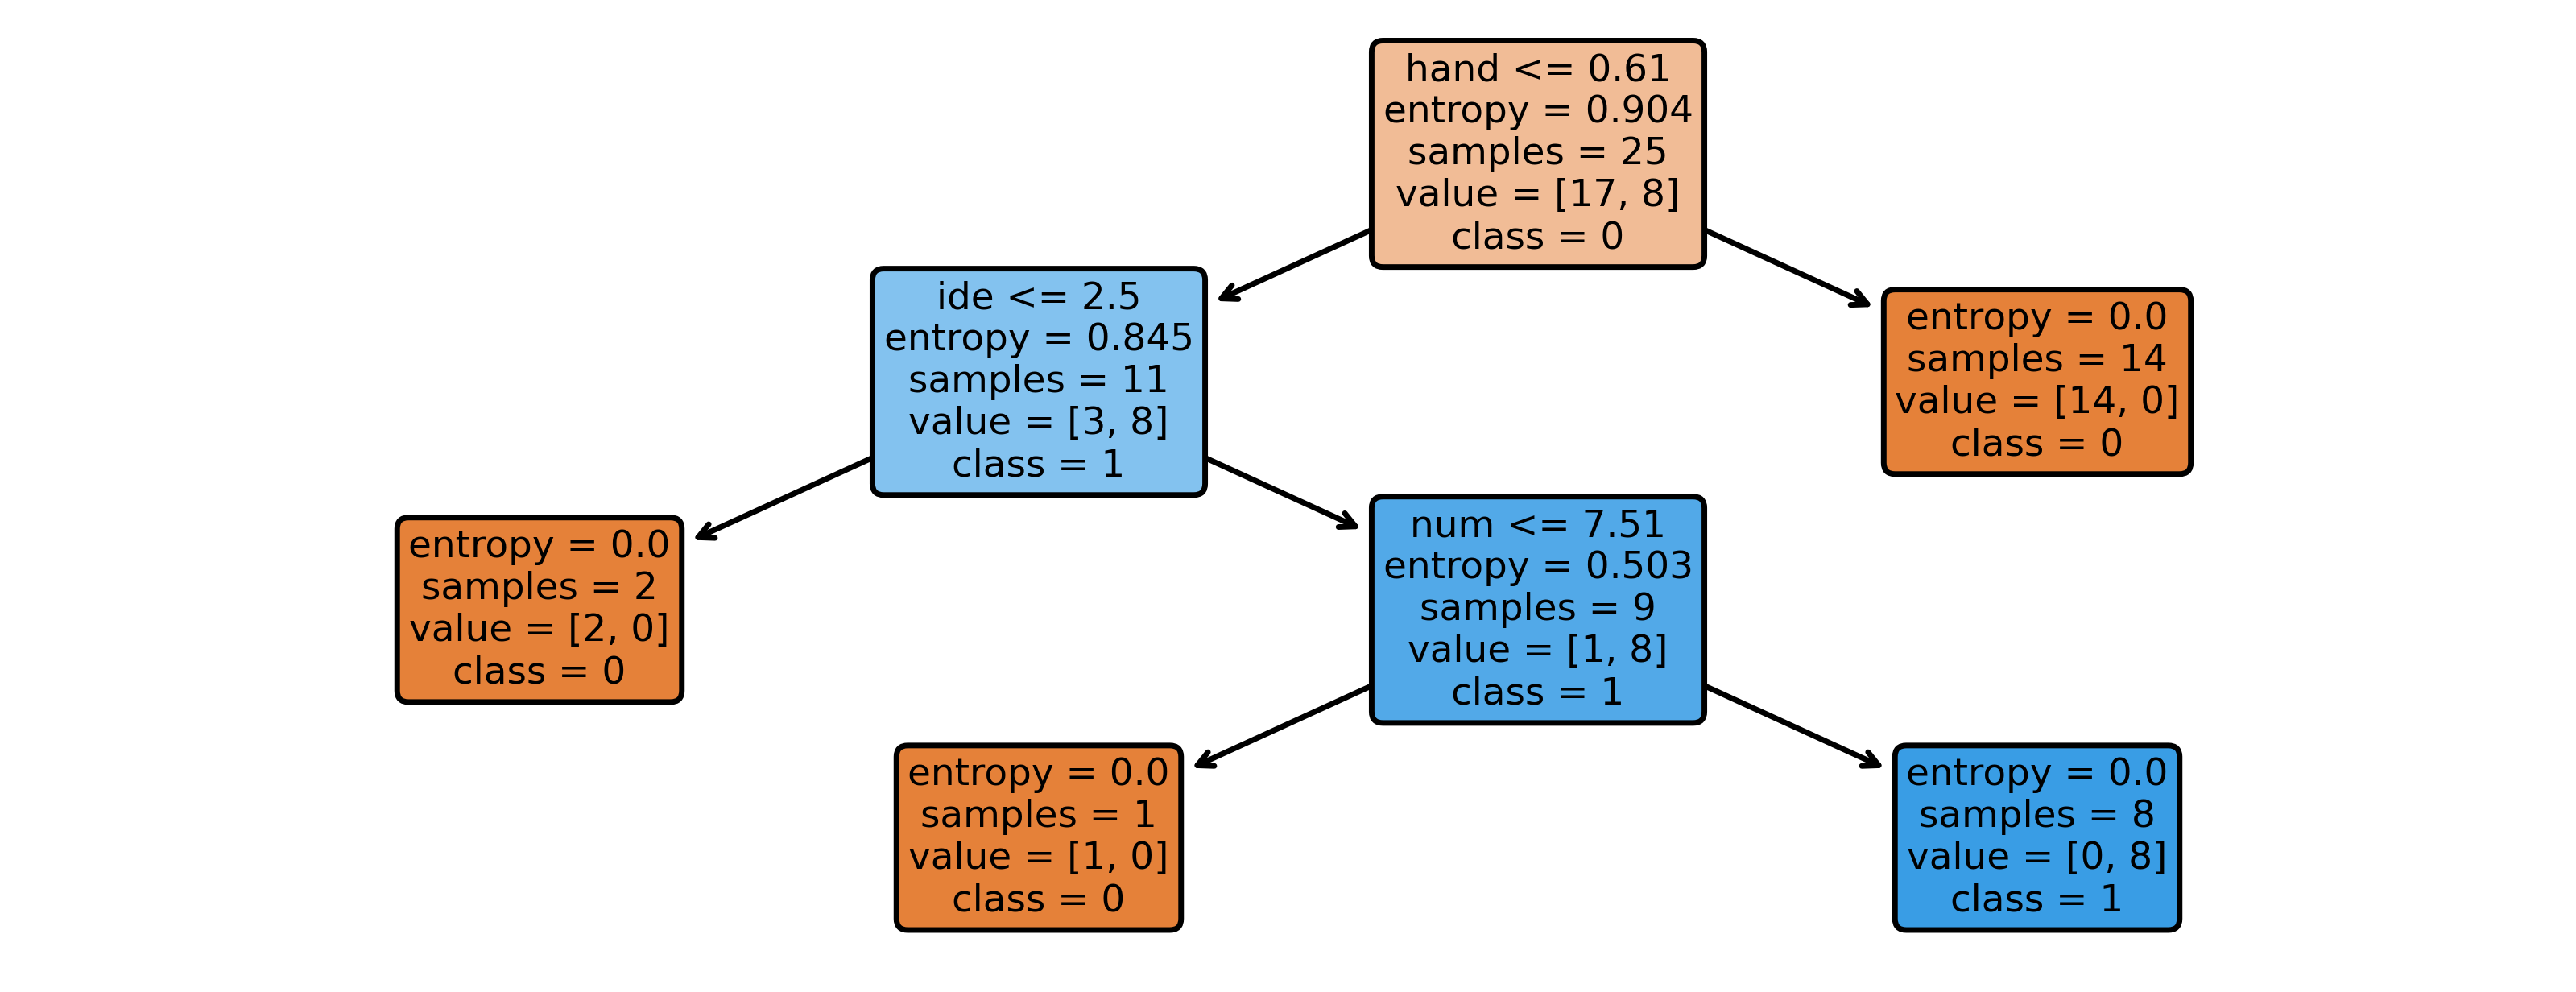

In [10]:
plt.figure(figsize=(8, 3), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('sample_data/graphics/data03-ide_audio.png')